In [23]:
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt

# print(plt.style.available) # uncomment to print all styles
import seaborn as sns
sns.set(font_scale=2)
plt.style.use('seaborn-whitegrid')
plt.rcParams['figure.figsize'] = (8,6.0)
%matplotlib inline

### Let's make a matrix

Make the second column nearly linearly indepent to the first

In [24]:
n = 10
A = np.random.rand(n,n)

delta = 1e-16

A[:,1] = A[:,0] + delta*A[:,1]
print("cond = %g" % np.linalg.cond(A))

cond = 4.31839e+16


### Make a problem we know the answer to:

Let $x={\bf 1}$, then $x$ solves the problem
$$
A x = b
$$
where $b = A {\bf 1}$.

In [7]:
# This is the exact solution
x = np.ones((n,))
b = A.dot(x)

In [8]:
# This is the approximated solution
xnum = np.linalg.solve(A, b)

## Residual Versus Error
$$
r = b - A x
$$
whereas
$$
e = x_{exact} - x
$$

In [10]:
x

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.])

In [11]:
xnum

array([ 1.69227755,  0.30772245,  1.        ,  1.        ,  1.        ,
        1.        ,  1.        ,  1.        ,  1.        ,  1.        ])

In [13]:
r = b - A@xnum
e = x - xnum

In [16]:
print("norm of residual = ", la.norm(r))
print("norm of the error = ", la.norm(e))

norm of residual =  2.08296302865e-15
norm of the error =  0.979028299959


## Let's do a test

We'll do the following steps
1. Make a matrix $A$
2. Find it's smallest eigenvalue $\lambda$, then $A - \lambda I$ would be singular
3. Instead, let's make B = $A - \lambda \cdot c\cdot I$ where c is a parameter in $[0,1]$.  This will make the problem closer and closer to singular.
4. Plot the condition number versus the error.

In [17]:
n = 10
A = np.random.rand(n,n)
A = A.dot(A.T)  # make it symmetric
v, _ = np.linalg.eig(A)
lmbda = np.min(np.abs(v))
I = np.eye(n,n)
print(lmbda)
print(np.linalg.cond(A - lmbda*I))

0.00513508799599
2.14377789306e+18


In [18]:
x = np.ones((n,))
b = A.dot(x)

cond = []
error = []
clist = 1.0-1.0/np.logspace(0,15,int(100))
clist.sort()
for c in clist:
    B = A - lmbda * c * I
    xnum = np.linalg.solve(B, b)
    cond.append(np.linalg.cond(B))
    error.append(np.linalg.norm(x-xnum))

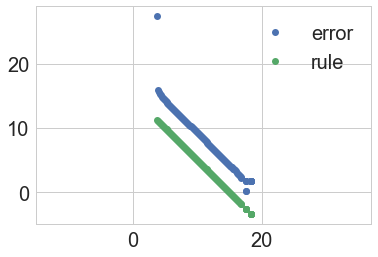

In [19]:
plt.plot(np.log10(cond),15-np.log10(error), 'o', label='error')
plt.plot(np.log10(cond),15-np.log10(cond), 'o', label='rule')
plt.axis('equal')
plt.legend()

In [20]:
import random
lambda1 = random.randint(3,12)
while 1:
    lambda2 = random.randint(5,20)
    if lambda2 != lambda1:
        break

A = np.array([[lambda1,0],[random.randint(-4,4),lambda2]])

In [21]:
A

array([[ 7,  0],
       [-3, 19]])